# Explorations in Convex Optimization

###Sources

1. [Convex Optimization Basics](https://youtu.be/oLowhs83aHk?t=148)
2. [Introduction to Convex Optimization for Machine Learning](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf) — **From Ted**!
3. [Convex Optimization for Python](https://www.cvxpy.org/)


###Index:  

1. Convex Functions
2. Demonstrating Properties 4 and 5
3. Introduction to Convex Optimization
4. The Max-Min Inequality
5. Creating a Colormap
6. Lagrange Multipliers and Duality
7. Conclusion

## Convex Functions
### Sources: 
1. [Convex Optimization Basics](https://youtu.be/oLowhs83aHk?t=148)
2. [Introduction to Convex Optimization for Machine Learning](https://people.eecs.berkeley.edu/~jordan/courses/294-fall09/lectures/optimization/slides.pdf) — **From Ted**!

A way to understand Convex Functions is through a graphical representation: if you take a chord between two points on a function, it's always above the function. 

Therefore, from this understanding, I concluded that **convex optimization is all about finding the minima of convex functions.**

Some properties of convex functions: 

1. Any local minimum is a global minimum
2. When the function is twice-differentiable, or where it exists, the "Hessian matrix is positive semi-definite" (meaning that the functions are like "quadratic bowls" locally)
3. "Level sets" of a convex function are convex sets (in 2D space, level sets consist of countour lines. In 3D space, they are also known as level surfaces)
4. A convex function multiplied by a constant is still a convex function. Also, the sum of two convex functions is a convex function
5. The max of a convex function is convex

After I watching this portion of the video, I asked myself: 
**how can I demonstrate properties 4 and 5 graphically in python?** Not only would this benefit my understanding of the properties, but it also would give me some skills needed to graph convex functions later in my investigation.

So, as the video did, I will also demonstrate the 4th and 5th properties of convex functions using [matplotlib](https://matplotlib.org/2.1.1/tutorials/index.html): 

**Note**: I refer to the following terms interchangeably throughout the documentation: 
- method or function or subroutine
- input or parameter
- list or array or set


In [ ]:
!pip3 install matplotlib

###Example of a Convex Function

This was my first time using python for a big project in over a year. However, I was able to review the basics of matplotlib fairly quickly. It wasn't too hard to remember the basic syntax of the language, but I reviewed some data structures and techniques that I had forgotten. 

In the cell below, I plot a simple parabola with two different chords connecting points. This is a good basic example of a convex function. 

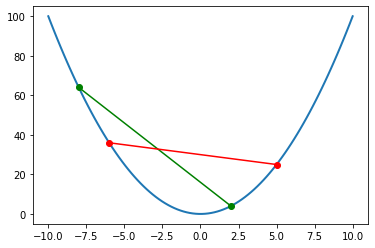

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100)
y = x**2

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=2.0)

#green chord
plt.plot([2, -8], [4, 64], 'go')
plt.plot([2, -8], [4, 64], 'g')

#red chord
plt.plot([5, -6], [25, 36], 'ro')
plt.plot([5, -6], [25, 36], 'r')

##Demonstrating Properties 4 and 5

###Citations: 

1. [intersection of two graphs](https://stackoverflow.com/questions/28766692/intersection-of-two-graphs-in-python-find-the-x-value)
2. [piecewise functions](https://stackoverflow.com/questions/51451046/plotting-function-for-specified-intervals-in-python-matplotlib/51452053)

In the cell below, I give a graphical representation for the fourth property or "A convex function multiplied by a constant is still a convex function. Also, the sum of two convex functions is a convex function." This is shown by graphing three functions: f(x), g(x), and the average of the two. 

```
ax.plot(x, y1, 'b', label="f(x)")
ax.plot(x, y2, 'g', label="g(x)")
ax.plot(x, avg, 'k', label="0.5(f(x) + g(x))")
```
In order to demonstrate the fifth property or "The max of a convex function is convex," I wrote methods to find the slope and the line between the points of intersection. 


```
#slope method
def slope(x1, y1, x2, y2): 
  m = (y2 - y1)/(x2 - x1)
  return m

#get line between points method
def point_slope(m, x1, y1): 
  x = sym.Symbol("x")
  y = (m * (x - x1)) + y1
  print("chord: y = " + str(y))

```
Therefore, in the following cell, I was able to graph the pointwise maximum of functions f(x) and g(x) using [sympy](https://docs.sympy.org/latest/modules/plotting.html), showing that it is also convex. 

chord: y = 3.23232323232323*x + 26.6299357208448


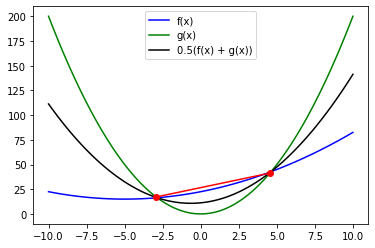

In [2]:
import sympy as sym

x = np.linspace(-10, 10, 100)

y1 = 0.3*(x + 5)**2+15
y2 = 2*x**2
avg = 0.5 * (y1 + y2)

fig, ax = plt.subplots()

#f(x), g(x), and their average
ax.plot(x, y1, 'b', label="f(x)")
ax.plot(x, y2, 'g', label="g(x)")
ax.plot(x, avg, 'k', label="0.5(f(x) + g(x))")

#line between points of intersection
idx = np.argwhere(np.diff(np.sign(y2 - y1))).flatten() #citation 1
points = ax.plot(x[idx], y2[idx], 'ro')
ax.plot(x[idx], y2[idx], 'r')

ax.legend()

#slope method
def slope(x1, y1, x2, y2): 
  m = (y2 - y1)/(x2 - x1)
  return m

#get line between points method
def point_slope(m, x1, y1): 
  x = sym.Symbol("x")
  y = (m * (x - x1)) + y1
  print("chord: y = " + str(y))

#get points of intersection
x_coord = points[0].get_xdata()
y_coord = points[0].get_ydata()

chord_slope = slope(x_coord[0], y_coord[0], x_coord[1], y_coord[1])
point_slope(chord_slope, x_coord[0], y_coord[0])

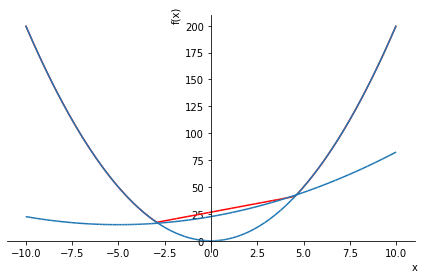

In [3]:
import sympy as sym
from sympy.plotting import plot

x = sym.symbols('x') 
y1 = 0.3*(x + 5)**2+15
y2 = 2*x**2

f = plot(y1, y2, show=False)
p = sym.Piecewise((2*x**2, x>x_coord[1]), 
                  (3.23232323232323*x + 26.6299357208448, x>=x_coord[0]), 
                  (2*x**2, x>=-10)) #citation 2
max = plot(p, (x, -10,10), line_color="red", show=False)

max.extend(f)
max.show()

##Convex Optimization

This is when I was first introduced to the concept of [convex optimization](https://youtu.be/oLowhs83aHk?t=260). 

Convex optimization is done using contraints. It is required that both the objective function and the inequality constraints are **convex functions**. Additionally, the inequality constraints must be **affine**, meaning that they take the form: 
```
f(x_1, ..., xn) = a_1 * x_1 + ... a_n * x_n + b
```
Lastly, these **constraints** define a **convex set**, and when combined with the objective function, **all local minima are in fact global minima**. 

Some terms to keep in mind are: 
- **optimization variable** - input vector to the function
- **objective/cost function** - function that is minimized
- **inequality and equality** constraints
- feasible set - set of points that satisfy constraints
- optimal value - minimum value of the function
- optimal point - element of feasible set that achieves optimal value
- active point - point at which inequality constraint is = 0
- inactive point - point at which inequality constraint is < 0

##The Max-Min Inequality

The max-min inequality is useful when considering the "duality" of convex optimization problems, or a sort of transformation from one optimization problem to another. 

For any function$$f : X \times Y \rightarrow \mathbb{R}:$$
$$max min f(x, y) \le min max f(x, y)$$

"the maximum over one variable of the minimum over the other variable is never greater than the other way around" 

Basically, **the max of the min can't be larger than the min of the max.**

While I was learning about this, I asked myself: **how can I show this graphically/geometrically?** The video had its own interesting demonstration, so I attempted to demonstrate this using a grid of colors in matplotlib and finding the: 

- minimum color values for each row and the maximum value out of that set,

and the 
- maximum colors for each column and the minimum value out of that set. 

That way, I'll be showing that the maximum over one variable of the minimum over the other variable *(the highest color value out of the minimum row color values)* is never greater than the other way around *(the lowest color value out of the maximum column color values)*. 

I assumed that this project would take no longer than a couple hours, but I couldn't have been more wrong. 



##Creating a Colormap

My first step to visualizing this problem was to create a color map with an array of cells: 

###Citations

1. [Creating a Colormap](https://matplotlib.org/devdocs/tutorials/colors/colormap-manipulation.html#sphx-glr-tutorials-colors-colormap-manipulation-py)
2. [Color Scales](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html)

First, I borrowed and modified a method from the official colormap tutorial that takes a colormap as a parameter and renders it on a graph. This is done by randomizing where each color is placed and drawing them on the plot. 

```
def plot_examples(colormaps): 
  np.random.seed(19680801)
  data = np.random.randn(30, 30)
  n = len(colormaps)
  fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                          constrained_layout=True, squeeze=False)
  for[ax, cmap] in zip(axs.flat, colormaps):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    fig.colorbar(psm, ax=ax)
  plt.show()
```

These lines create subplots based on how many arguments the method receives when it is called. The variable "n" represents the amount of columns, or rather the amount of plots the method will render: 

```
n = len(colormaps)
fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
constrained_layout=True, squeeze=False)
```
In this case, n = 1 since I'm only plotting the plasma colormap. 

One of the most useful parts of this cell is the line that randomizes the grid: 

```
data = np.random.randn(30, 30)
```
As of now, it is set to (30, 30), meaning that it will draw a 30 by 30 grid. Later, when I wondered whether the colors in the ```plasma.colors``` list were arranged in order of where they are placed in the grid, I changed the dimensions and concluded that they were ordered from low to high in magnitude. 

The last two lines generate the colormap using a "plasma" color-scheme with 10 colors: 

```
plasma = cm.get_cmap('plasma', 10)
plot_examples([plasma])
```



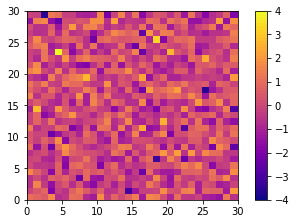

In [ ]:
#Citation 1, slightly modified and used as reference

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#colormap plotting method
def plot_examples(colormaps): 
  np.random.seed(19680801)
  data = np.random.randn(30, 30)
  n = len(colormaps)
  fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                          constrained_layout=True, squeeze=False)
  for[ax, cmap] in zip(axs.flat, colormaps):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    fig.colorbar(psm, ax=ax)

  plt.show()

#creating a colormap with the plasma color scheme with 64 color values
plasma = cm.get_cmap('plasma', 64)
plot_examples([plasma])

###Cell Color Values

Now it's necessary to get the color values for each cell (represented as data values vmin to vmax) as we'll need these as inputs for our max-min inequality. 

At this point in the project, I had difficulty finding the "v" value of the cells in the colormap. After a few hours of not finding any simple solutions, I decided to write a proof of concept to simplify the problem. I realized that I could use list comprehension to first convert all of the rgb values to hsv, and then I could finally create a list of v values for all the colors. 

In [ ]:
import colorsys

#proof of concept
colors = [[0, 0.5, 0.2], [0, 0.2, 0.1], [0.5, 0.2, 0.4]]
colorsys.rgb_to_hsv(colors[0][0], colors[0][1], colors[0][2])

"""
for x in colors: 
  values = list(colorsys.rgb_to_hsv(x[0], x[1], x[2]))
  print(values)
"""

#converts rgb to hsv
hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in colors] 
#creates a list with only l values
v = [x[2] for x in hsv]
print("concept:", v)

plasma_hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in plasma.colors]
plasma_v = [x[2] for x in plasma_hsv]
print("plasma value:", plasma_v)

concept: [0.5, 0.2, 0.5]
plasma value: [0.527975, 0.527975, 0.527975, 0.527975, 0.533124, 0.533124, 0.533124, 0.533124, 0.538007, 0.538007, 0.538007, 0.538007, 0.542658, 0.542658, 0.542658, 0.542658, 0.547103, 0.547103, 0.547103, 0.547103, 0.551368, 0.551368, 0.551368, 0.551368, 0.555468, 0.555468, 0.555468, 0.555468, 0.559423, 0.559423, 0.559423, 0.559423, 0.56325, 0.56325, 0.56325, 0.56325, 0.566959, 0.566959, 0.566959, 0.566959, 0.570562, 0.570562, 0.570562, 0.574065, 0.574065, 0.574065, 0.574065, 0.577478, 0.577478, 0.577478, 0.577478, 0.580806, 0.580806, 0.580806, 0.580806, 0.584054, 0.584054, 0.584054, 0.584054, 0.587228, 0.587228, 0.587228, 0.587228, 0.59033, 0.59033, 0.59033, 0.59033, 0.593364, 0.593364, 0.593364, 0.593364, 0.596333, 0.596333, 0.596333, 0.596333, 0.599239, 0.599239, 0.599239, 0.599239, 0.602083, 0.602083, 0.602083, 0.604867, 0.604867, 0.604867, 0.604867, 0.607592, 0.607592, 0.607592, 0.607592, 0.610259, 0.610259, 0.610259, 0.610259, 0.612868, 0.612868, 0.612868

###Implementing the Max-Min Inequality

After successfully finding the l values for the different colors in the colormap, I set out to find four things: 

1. The minimum values for each row
2. The maximum of those values
3. The maximum values for each column
4. The minimum of those values

**Although this would only be for the randomized distribution and not a specific convex function, I believe that it was a good start to a longer and much more complicated project.**

If I could show that #2 is always less than or equal to #4, then I could demonstrate the max-min inequality. 

However, finding the minimum or maximum values for rows or columns turned out to be harder than I initially anticipated. While I was searching for the v values in the previous cell, **I assumed that the color values were arranged from left to right in the grid.** If this was the case, it would be relatively easy to separate the array into sections representing each row, and I could just find the minimum or maximum value in those smaller arrays. However, **it turned out that the colors were arranged from low to high in magnitude.** I had to find a different way to parse through the rows and columns of the colormap. 

**I started solving this problem by analyzing what I understood the least**: the block of code that I borrowed from the official tutorial. I wanted to understand what the line ```data = np.random.randn(30, 30)``` really meant. So I printed out ```data``` and discovered that it was a two-dimensional array that contained as many elements as the amount of cells in the colormap. I concluded that each element represented a different cell, and my hypothesis was that the element's color could be accessed with a method I was familiar that took a argument. 

I was correct, but I stil didn't know whether the subarrays represented rows or columns. In hindsight, I could have simply changed the amount of columns with the ```data = np.random.randn(rows, columns)``` line, but instead I guessed and tested both cases. I started out by simplying the colormap to have only two colors and setting smaller dimensions for the grid. That way, when I would print out a single subarray, I could match the hue values and count them one-by-one to see if they lined up, either in rows or in columns. This process confused me the most because I chose extremely small dimensions at first (3 x 3), tested whether or not the subarray represented a row, and concluded that it did when in fact it actually represented a column. 

The method ```get_column_value``` takes two parameters: the column to get values from (in the order of left to right) and the colormap to iterate over. The lines

```
column_list = [row[n_column - 1] for row in data] 
rgb = [cmap(x) for x in column_list]
hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in rgb] 
v = [x[2] for x in hsv]
```
are all list comprehensions for loops that: 

- create a list of all the identifiers in a column using the data array
- create a list of all the rgb values using the identifiers
- convert the rgb values to hsv (hue, saturation, value) values
- create a list of all the values from the hsv array

The method ```get_row_value``` does something similar except of course with rows in the grid. Also, there was no need to take every nth element of each subarray for the row method because the subarrays were already organized as elements in each row. 

As I mention in the comments of the following cell, **column 1 is the leftmost column**, while **row 1 is the topmost row**. 

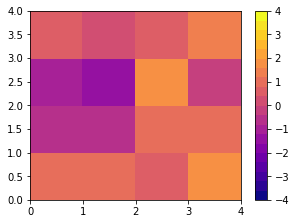

column 1 value: [0.975158, 0.527975, 0.527975, 0.986345]
row 2 value: [0.527975, 0.527975, 0.975158, 0.975158]


In [ ]:
#proof of concept: printing out row and column values

data = np.random.randn(4, 4)

#plots colormap
def plot_examples_2(colormaps): 
  np.random.seed(19680801)
  n = len(colormaps)
  fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                          constrained_layout=True, squeeze=False)
  for[ax, cmap] in zip(axs.flat, colormaps):
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
    fig.colorbar(psm, ax=ax)

  plt.show()

#print out column values
def get_column_value(n_column, cmap): 
  column_list = [row[n_column - 1] for row in data] 
  rgb = [cmap(x) for x in column_list]
  hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in rgb] 
  v = [x[2] for x in hsv]
  print("column {} value:".format(n_column), v)

#print out row values
def get_row_value(n_row, cmap): 
  row_list = data[n_row - 1]
  rgb = [cmap(x) for x in row_list]
  hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in rgb] 
  v = [x[2] for x in hsv]
  print("row {} value:".format(n_row), v)

#creating a colormap with the plasma color scheme with 20 color values
plasma = cm.get_cmap('plasma', 20)
plot_examples_2([plasma])

#column 1 is the leftmost column
get_column_value(1, plasma)
#row 1 is the topmost row
get_row_value(2, plasma)

##Final Results

This is where I'd gotten all the hardest parts out of the way and all I needed to do was to implement everything for a convex function. I redefined all of my methods to get the minimum and maximum values of columns and rows. 


Finally, I was able to compare the ```max_of_min```, or the **maximum of all the minimum row values**, to the ```min_of_max```, or the **minimum of all the maximum column values**, and show that ```max_of_min <= min_of_max```. 

However, the hardest part of all is **showing this demonstration with an actual convex function** instead of just a randomized distribution. An extension of this project would be to repeat this process but adapt it to work well with the  quadric surface like an parabolic ellipsoid. 

For now, the functions were developed as a **proof of concept**, demonstrating the possibilities of performing computations in the future with a variety of quadric surfaces. 

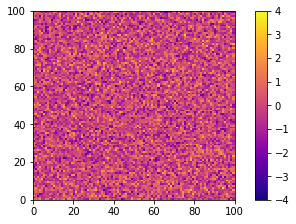

[0.527975] <= [0.975158]


In [ ]:
import heapq

y_dim = 100
x_dim = 100

#create a convex function
data = np.random.randn(y_dim, x_dim)

plasma = cm.get_cmap('plasma', 1000)
plot_examples_2([plasma])

#redefine functions to return min or max

def get_min_col(n_col, cmap): 
  col_list = [row[n_col - 1] for row in data] 
  rgb = [cmap(x) for x in col_list]
  hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in rgb] 
  v = [x[2] for x in hsv]
  return min(v)

def get_max_col(n_col, cmap): 
  col_list = [row[n_col - 1] for row in data] 
  rgb = [cmap(x) for x in col_list]
  hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in rgb] 
  v = [x[2] for x in hsv]
  #maximum 
  return heapq.nlargest(1, v)

def get_min_row(n_row, cmap): 
  row_list = data[n_row - 1]
  rgb = [cmap(x) for x in row_list]
  hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in rgb] 
  v = [x[2] for x in hsv]
  return min(v)

def get_max_row(n_row, cmap): 
  row_list = data[n_row - 1]
  rgb = [cmap(x) for x in row_list]
  hsv = [list(colorsys.rgb_to_hsv(x[0], x[1], x[2])) for x in rgb] 
  v = [x[2] for x in hsv]
  #maximum
  return heapq.nlargest(1, v)

row_mins = [get_min_row(x + 1, plasma) for x in range(0, y_dim)]
col_mins = [get_min_col(x + 1, plasma) for x in range(0, x_dim)]
row_max = [get_max_row(x + 1, plasma) for x in range(0, y_dim)]
col_max = [get_max_col(x + 1, plasma) for x in range(0, x_dim)]

#demonstrating the max-min inequality
print(str(heapq.nlargest(1, row_mins)) + " <= " + str(min(col_max)))

###Lagrange Multipliers as Constraints

In this case, lagrange multipliers are used as the constraints: 

$$
\lambda = [\lambda_1, ..., \lambda_J]^T \ge 0
$$

And the Lagrangian gives an alternative way to write the objective/cost function. The objective function can be written as a max over lambda of the Lagrangian where: 

$$
\newcommand{\Lagr}{\mathcal{L}}
\Lagr(x, \lambda) = f_0(x) + \sum_{j = 1}^{J} \lambda_j f_j(x)
$$

and 

$$
\mathcal{P}(x) = \max_{\lambda \gt 0} \Lagr(x, \lambda)
$$

Ultimately, the objective is to minimize the cost function, so we get: 

$$
\min\mathcal{P}(x) = \min_{x}\max_{\lambda \gt 0} \Lagr(x, \lambda)
$$

If any constraints are violated, then because of the sum, the max of the Lagrangian would approach infinity. This would work against optimization, so x values that would violate constraints are never selected. 

Therefore, the max-min inequality is: 

$$
\max_{\lambda \ge 0} \min_{x} \Lagr (x, \lambda) \le \min_{x} \max_{\lambda \ge 0} \Lagr (x, \lambda) 
$$

The expression on the left gives a lower bound for the problem, and can be represented as: 

$$
\mathcal{D}(\lambda) = \min_{x} \Lagr(x, \lambda)
$$

which is of course maximized with respect to lambda. This is called "maxmizing the dual." After minimizing the "primal" (the cost function) and maximizing the "dual," comparing the two solutions gives the "duality gap" or the difference between the two optima. If the duality gap is zero, then there is "strong duality" and therefore the same answer can be reached by solving either the primal or the dual. 

##Conclusions

And that brings us to the end of my exploration of convex optimization for this module! However, this is really only the beginning. As I mentioned in my journal, the [online princeton course for machine learning math](https://www.cs.princeton.edu/courses/archive/spring20/cos302/) that I found is full with resources I can use to further my learning down the line. As I become a better programmer and mathematician, I will refer back to these notes and apply them to my explorations in the future. 